In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# EDA

date	Date and time of the observation.

p	Atmospheric pressure in millibars (mbar).

T	Air temperature in degrees Celsius (°C).

Tpot	Potential temperature in Kelvin (K), representing the temperature an air parcel would have if moved to a standard pressure level.

Tdew	Dew point temperature in degrees Celsius (°C), indicating the temperature at which air becomes saturated with moisture.

rh	Relative humidity as a percentage (%), showing the amount of moisture in the air relative to the maximum it can hold at that temperature.

VPmax	Maximum vapor pressure in millibars (mbar), representing the maximum pressure exerted by water vapor at the given temperature.

VPact	Actual vapor pressure in millibars (mbar), indicating the current water vapor pressure in the air.

VPdef	Vapor pressure deficit in millibars (mbar), measuring the difference between maximum and actual vapor pressure, used to gauge drying potential.

sh	Specific humidity in grams per kilogram (g/kg), showing the mass of water vapor per kilogram of air.

H2OC	Concentration of water vapor in millimoles per mole (mmol/mol) of dry air.

rho	Air density in grams per cubic meter (g/m³), reflecting the mass of air per unit volume.

wv	Wind speed in meters per second (m/s), measuring the horizontal motion of air.

max. wv	Maximum wind speed in meters per second (m/s), indicating the highest recorded wind speed over the period.

wd	Wind direction in degrees (°), representing the direction from which the wind is blowing.

rain	Total rainfall in millimeters (mm), showing the amount of precipitation over the observation period.

raining	Duration of rainfall in seconds (s), recording the time for which rain occurred during the observation period.

SWDR	Short-wave downward radiation in watts per square meter (W/m²), measuring incoming solar radiation.

PAR	Photosynthetically active radiation in micromoles per square meter per second (µmol/m²/s), indicating the amount of light available for photosynthesis.

max. PAR	Maximum photosynthetically active radiation recorded in the observation period in µmol/m²/s.

Tlog	Temperature logged in degrees Celsius (°C), potentially from a secondary sensor or logger.

OT	Likely refers to an "operational timestamp" or an offset in time, but may need clarification depending on the dataset's context.

In [3]:
df = pd.read_csv('data')
df

,date,p,T,Tpot,Tdew,rh,VPmax,VPact,VPdef,sh,...,rho,wv,max. wv,wd,rain,raining,SWDR,PAR,max. PAR,Tlog
0,2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,...,1280.62,1.02,1.60,224.3,0.0,0.0,0.0,0.0,0.0,11.45
1,2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,...,1280.33,0.43,0.84,206.8,0.0,0.0,0.0,0.0,0.0,11.51
2,2020-01-01 00:30:00,1008.66,0.73,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,...,1280.29,0.61,1.48,197.1,0.0,0.0,0.0,0.0,0.0,11.60
3,2020-01-01 00:40:00,1008.64,0.37,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,...,1281.97,1.11,1.48,206.4,0.0,0.0,0.0,0.0,0.0,11.70
4,2020-01-01 00:50:00,1008.61,0.33,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,...,1282.08,0.49,1.40,209.6,0.0,0.0,0.0,0.0,0.0,11.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52691,2020-12-31 23:20:00,978.32,2.28,277.16,-0.80,80.0,7.20,5.76,1.44,3.67,...,1234.61,0.73,1.40,180.6,0.0,0.0,0.0,0.0,0.0,13.40
52692,2020-12-31 23:30:00,978.30,2.13,277.01,-0.43,83.1,7.12,5.92,1.20,3.77,...,1235.20,0.43,0.82,174.0,0.0,0.0,0.0,0.0,0.0,13.42
52693,2020-12-31 23:40:00,978.26,1.99,276.88,-0.71,82.2,7.05,5.80,1.26,3.69,...,1235.82,0.38,0.76,248.9,0.0,0.0,0.0,0.0,0.0,13.45
52694,2020-12-31 23:50:00,978.26,2.07,276.95,-0.77,81.4,7.09,5.77,1.32,3.68,...,1235.49,0.57,1.07,196.6,0.0,0.0,0.0,0.0,0.0,13.47


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52696 entries, 0 to 52695
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      52696 non-null  object 
 1   p         52696 non-null  float64
 2   T         52696 non-null  float64
 3   Tpot      52696 non-null  float64
 4   Tdew      52696 non-null  float64
 5   rh        52696 non-null  float64
 6   VPmax     52696 non-null  float64
 7   VPact     52696 non-null  float64
 8   VPdef     52696 non-null  float64
 9   sh        52696 non-null  float64
 10  H2OC      52696 non-null  float64
 11  rho       52696 non-null  float64
 12  wv        52696 non-null  float64
 13  max. wv   52696 non-null  float64
 14  wd        52696 non-null  float64
 15  rain      52696 non-null  float64
 16  raining   52696 non-null  float64
 17  SWDR      52696 non-null  float64
 18  PAR       52696 non-null  float64
 19  max. PAR  52696 non-null  float64
 20  Tlog      52696 non-null  fl

In [8]:
df = pd.read_csv('data', parse_dates=['date'], index_col="date")
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52696 entries, 2020-01-01 00:10:00 to 2021-01-01 00:00:00
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   p         52696 non-null  float64
 1   T         52696 non-null  float64
 2   Tpot      52696 non-null  float64
 3   Tdew      52696 non-null  float64
 4   rh        52696 non-null  float64
 5   VPmax     52696 non-null  float64
 6   VPact     52696 non-null  float64
 7   VPdef     52696 non-null  float64
 8   sh        52696 non-null  float64
 9   H2OC      52696 non-null  float64
 10  rho       52696 non-null  float64
 11  wv        52696 non-null  float64
 12  max. wv   52696 non-null  float64
 13  wd        52696 non-null  float64
 14  rain      52696 non-null  float64
 15  raining   52696 non-null  float64
 16  SWDR      52696 non-null  float64
 17  PAR       52696 non-null  float64
 18  max. PAR  52696 non-null  float64
 19  Tlog      52696 non-null  float6

In [9]:
df.isna().sum()

,0
p,0
T,0
Tpot,0
Tdew,0
rh,0
VPmax,0
VPact,0
VPdef,0
sh,0
H2OC,0


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
p,52696.0,989.989233,9.207149,955.58,984.8000,990.92,995.9300,1020.07
T,52696.0,10.818241,7.468671,-6.44,4.5900,10.23,16.1800,34.80
Tpot,52696.0,284.796938,7.616995,266.19,278.5500,284.32,290.2600,309.13
Tdew,52696.0,5.409105,5.956722,-13.81,0.7775,5.26,9.7000,20.50
rh,52696.0,72.487133,19.230260,21.16,58.8200,75.40,87.9000,100.00
VPmax,52696.0,14.487046,7.632960,3.77,8.4800,12.48,18.4200,55.67
VPact,52696.0,9.676828,4.023504,2.09,6.4600,8.89,12.0500,24.16
VPdef,52696.0,4.810131,5.539320,0.00,1.1700,2.74,6.4400,42.10
sh,52696.0,6.111159,2.561536,1.30,4.0700,5.61,7.6200,15.40
H2OC,52696.0,9.782341,4.082684,2.09,6.5300,8.99,12.2000,24.53


# Preprocess

In [11]:
df["year"] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek
df["date"] = df.index.date

df.head()

,p,T,Tpot,Tdew,rh,VPmax,VPact,VPdef,sh,H2OC,...,raining,SWDR,PAR,max. PAR,Tlog,year,month,day,dayofweek,date
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,5.49,...,0.0,0.0,0.0,0.0,11.45,2020,1,1,2,2020-01-01
2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,5.45,...,0.0,0.0,0.0,0.0,11.51,2020,1,1,2,2020-01-01
2020-01-01 00:30:00,1008.66,0.73,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,5.43,...,0.0,0.0,0.0,0.0,11.60,2020,1,1,2,2020-01-01
2020-01-01 00:40:00,1008.64,0.37,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,5.37,...,0.0,0.0,0.0,0.0,11.70,2020,1,1,2,2020-01-01
2020-01-01 00:50:00,1008.61,0.33,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,5.42,...,0.0,0.0,0.0,0.0,11.81,2020,1,1,2,2020-01-01


In [12]:
df_copy = df.copy()

In [13]:
df_copy = df_copy[['T', 'rain', 'wv', 'rh']]
df_copy

,T,rain,wv,rh
date,,,,
2020-01-01 00:10:00,0.71,0.0,1.02,86.1
2020-01-01 00:20:00,0.75,0.0,0.43,85.2
2020-01-01 00:30:00,0.73,0.0,0.61,85.1
2020-01-01 00:40:00,0.37,0.0,1.11,86.3
2020-01-01 00:50:00,0.33,0.0,0.49,87.4
...,...,...,...,...
2020-12-31 23:20:00,2.28,0.0,0.73,80.0
2020-12-31 23:30:00,2.13,0.0,0.43,83.1
2020-12-31 23:40:00,1.99,0.0,0.38,82.2


# Model

In [15]:
train_size = int(len(df_copy) * 0.8)
train, test = df_copy.iloc[:train_size], df_copy.iloc[train_size:]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Test MSE: 26.794


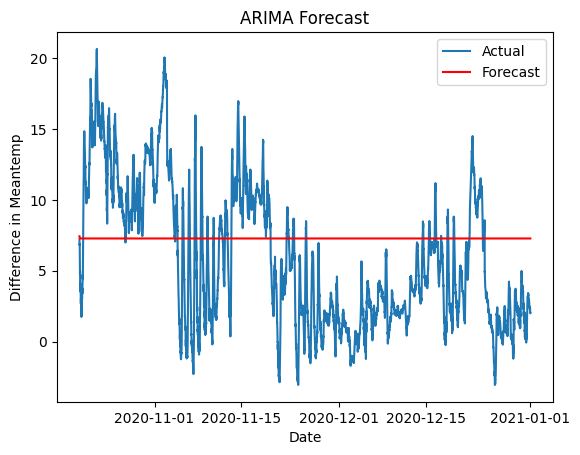

In [17]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

arima_model = ARIMA(train['T'], order=(1,1,1))
arima_model_fit = arima_model.fit()

arima_pred = arima_model_fit.forecast(steps=len(test))

error = mean_squared_error(test['T'], arima_pred)
print('Test MSE: %.3f' % error)

# Plot the results
plt.plot(test.index, test['T'], label='Actual')
plt.plot(test.index, arima_pred, color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Difference in Meantemp')
plt.title('ARIMA Forecast')

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi24coef4/b9evv8b5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi24coef4/l7fx1u8t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89461', 'data', 'file=/tmp/tmpi24coef4/b9evv8b5.json', 'init=/tmp/tmpi24coef4/l7fx1u8t.json', 'output', 'file=/tmp/tmpi24coef4/prophet_modelc6hd1a5s/prophet_model-20241205225719.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:57:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:58:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Test MSE: 17.020
Test R²: 0.316


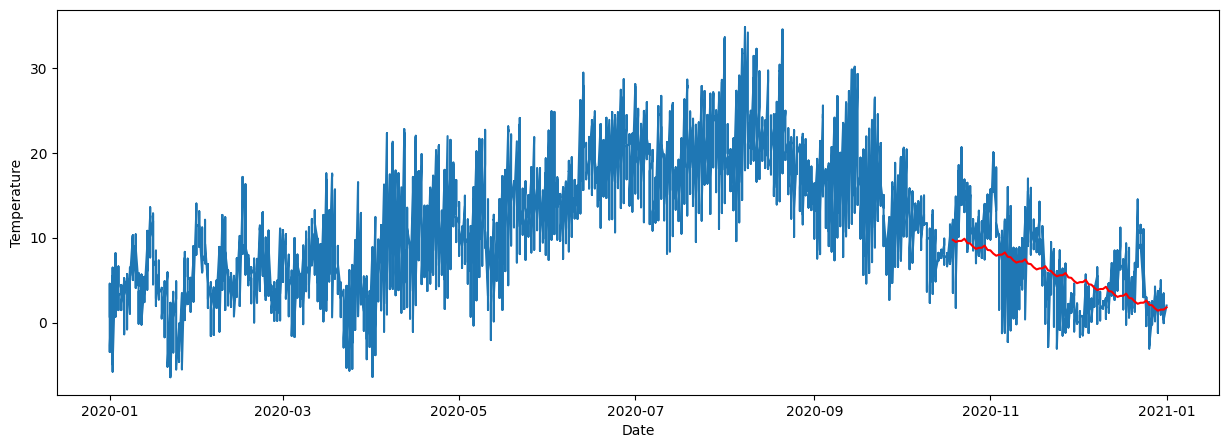

In [38]:
from prophet import Prophet

df_new = df_new.reset_index(drop=True)
df_new = df[['date', 'T']].rename(columns={'date': 'ds', 'T': 'y'})
df_new = df_new.sort_values('ds')

model = Prophet()
model.fit(df_new)

future = model.make_future_dataframe(periods=60)
forecast = model.predict(future)
predicted = forecast[['ds', 'yhat']].set_index('ds').loc[p_test['ds']]

mse = mean_squared_error(p_test['y'], predicted['yhat'])
r2 = r2_score(p_test['y'], predicted['yhat'])
print('Test MSE: %.3f' % mse)
print('Test R²: %.3f' % r2)

plt.figure(figsize=(15, 5))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Actual')
plt.plot(predicted.index, predicted['yhat'], color='red', label='Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature');

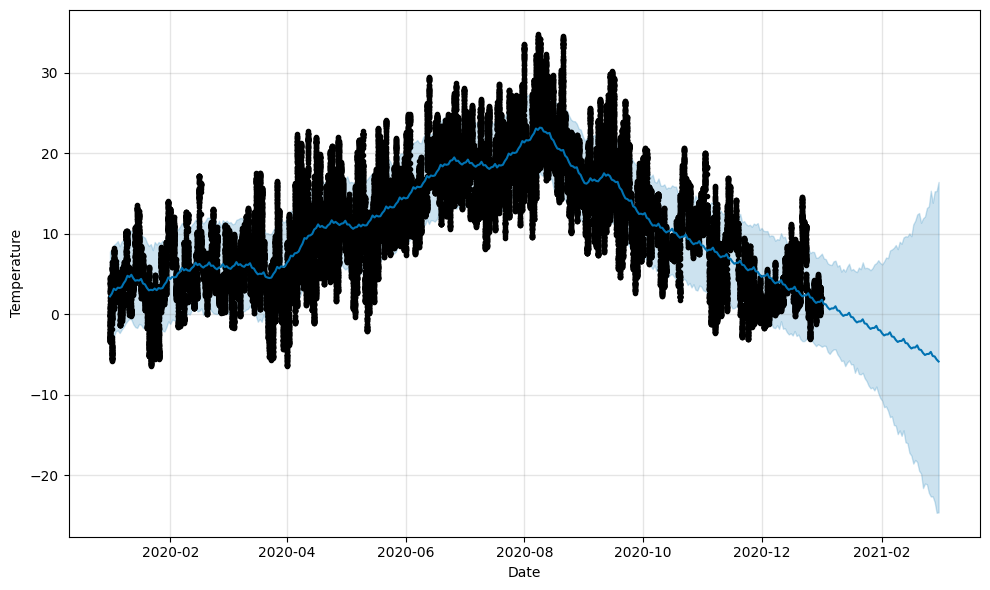

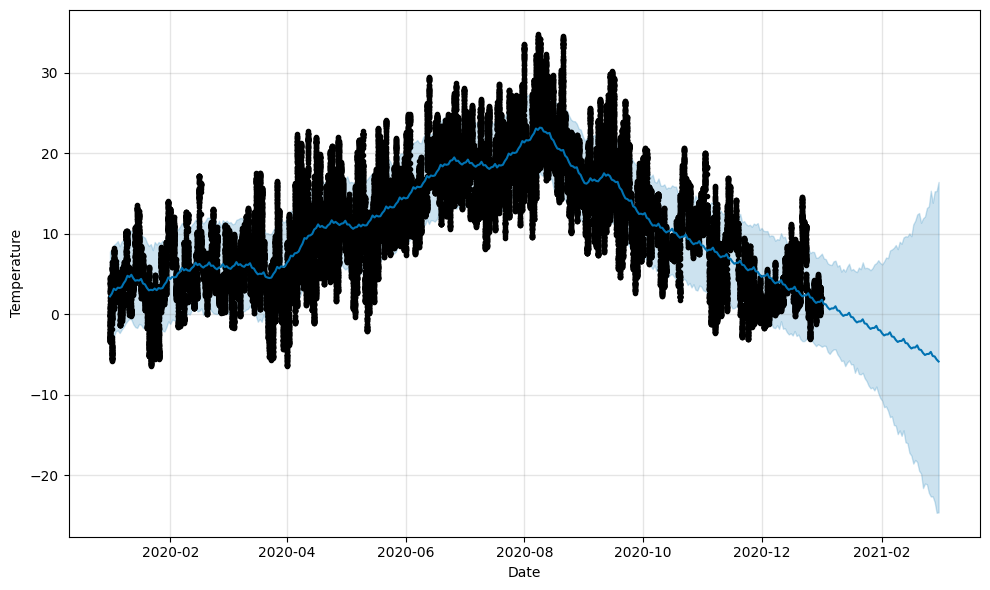

In [39]:
model.plot(forecast, xlabel='Date', ylabel='Temperature')